In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
pd.set_option('display.max_columns', None)

In [3]:
df = pd.read_csv('gurgaon_properties_outlier_treated.csv')

In [4]:
df.head()

,property_type,sector,society,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score,area_room_ratio
0,flat,dwarka expressway,Ansals Highland Park,1.20,6186.0,1940.0,Built Up area: 1940 (180.23 sq.m.),3,3,3+,4.0,NaN,Under Construction,NaN,1940.0,NaN,0,1,0,0,0,0,0,646.666667
1,flat,sector 86,Ansal Heights 86,1.30,4666.0,2786.0,Super Built up area 2786(258.83 sq.m.),4,6,2,11.0,East,New Property,2786.0,NaN,NaN,0,1,0,0,1,0,86,696.500000
2,flat,sohna road,Signature Global Park4.0 ★,0.72,5990.0,1202.0,Super Built up area 1210(112.41 sq.m.),2,2,3,3.0,North-West,Relatively New,1210.0,NaN,NaN,0,0,0,1,0,0,158,601.000000
3,house,sector 112,experion windchants,9.50,23457.0,4050.0,Plot area 450(376.26 sq.m.)Built Up area: 7450...,5,5,3,2.0,NaN,Relatively New,NaN,7450.0,NaN,0,1,0,0,0,0,45,810.000000
4,flat,sector 70a,BPTP Astaire Gardens3.7 ★,1.60,8658.0,1848.0,Super Built up area 1848(171.68 sq.m.)Built Up...,4,4,3,1.0,NaN,Relatively New,1848.0,1600.0,1400.0,1,0,0,0,1,0,42,462.000000


In [5]:
df.isnull().sum()

property_type             0
sector                    0
society                   1
price                     0
price_per_sqft            0
area                      0
areaWithType              0
bedRoom                   0
bathroom                  0
balcony                   0
floorNum                 17
facing                 1009
agePossession             0
super_built_up_area    1681
built_up_area          1968
carpet_area            1712
study room                0
servant room              0
store room                0
pooja room                0
others                    0
furnishing_type           0
luxury_score              0
area_room_ratio           0
dtype: int64

### Built up area

<Axes: xlabel='built_up_area', ylabel='super_built_up_area'>

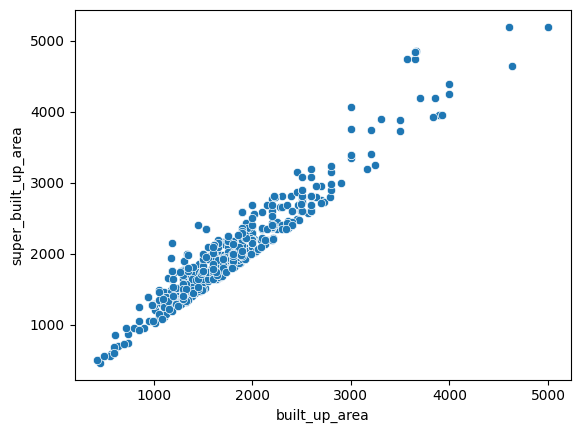

In [6]:
sns.scatterplot(x = df['built_up_area'],y = df['super_built_up_area'])

<Axes: xlabel='built_up_area', ylabel='carpet_area'>

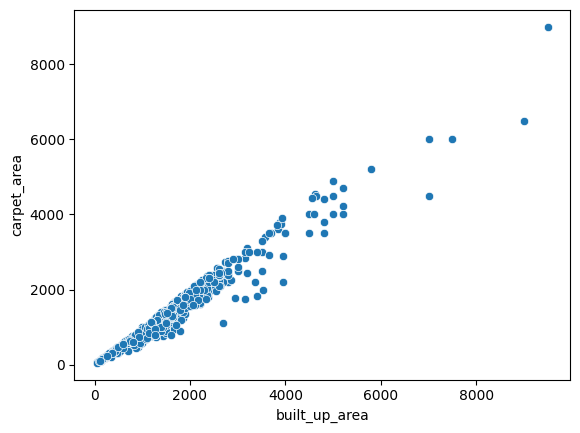

In [7]:
sns.scatterplot(x = df['built_up_area'],y = df['carpet_area'])

In [8]:
((df['super_built_up_area'].isnull()) & (df['built_up_area'].isnull()) & (df['carpet_area'].isnull()))

0       False
1       False
2       False
3       False
4       False
        ...  
3548    False
3549    False
3550    False
3551    False
3552    False
Length: 3553, dtype: bool

In [9]:
all_present_df = df[~((df['super_built_up_area'].isnull()) | (df['built_up_area'].isnull()) | (df['carpet_area'].isnull()))]

In [10]:
all_present_df.shape

(530, 24)

In [11]:
super_to_built_up_ratio = (all_present_df['super_built_up_area']/all_present_df['built_up_area']).median()

In [12]:
carpet_to_built_up_ratio = (all_present_df['carpet_area']/all_present_df['built_up_area']).median()

In [13]:
print(super_to_built_up_ratio, carpet_to_built_up_ratio)

1.1063815789473685 0.900140056022409


In [14]:
# both present built up null
sbc_df = df[~(df['super_built_up_area'].isnull()) & (df['built_up_area'].isnull()) & ~(df['carpet_area'].isnull())]

In [15]:
sbc_df.head()

,property_type,sector,society,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score,area_room_ratio
8,flat,sector 70a,Paras Irene3.7 ★,1.30,9220.0,1410.0,Super Built up area 1420(131.92 sq.m.)Carpet a...,2,2,3,19.0,NaN,Moderately Old,1420.0,NaN,1410.0,0,0,0,0,0,1,49,705.000000
19,flat,sector 83,Emaar Palm Gardens4.1 ★,1.30,11872.0,1095.0,Super Built up area 1720(159.79 sq.m.)Carpet a...,3,3,3,16.0,North,Relatively New,1720.0,NaN,1095.3,0,1,0,0,0,1,174,365.000000
20,flat,sector 67,M3M Merlin3.7 ★,2.80,13679.0,2047.0,Super Built up area 2047(190.17 sq.m.)Carpet a...,3,3,3,5.0,North-East,Moderately Old,2047.0,NaN,1880.0,0,1,0,0,0,2,26,682.333333
27,flat,sector 81,DLF The Ultima4.0 ★,3.50,11686.0,2995.0,Super Built up area 2995(278.24 sq.m.)Carpet a...,4,5,3+,7.0,North-East,Relatively New,2995.0,NaN,2200.0,0,1,0,0,0,2,174,748.750000
29,flat,sector 84,Alpha Corp GurgaonOne 844.0 ★,2.24,6523.0,3434.0,Super Built up area 3434(319.03 sq.m.)Carpet a...,4,4,3,12.0,West,Relatively New,3434.0,NaN,2900.0,0,1,0,0,0,0,20,858.500000


In [16]:
sbc_df['built_up_area'].fillna(round(((sbc_df['super_built_up_area']/1.105) + (sbc_df['carpet_area']/0.9))/2),inplace=True)

C:\Users\Sanjay\AppData\Local\Temp\ipykernel_17464\1215074969.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sbc_df['built_up_area'].fillna(round(((sbc_df['super_built_up_area']/1.105) + (sbc_df['carpet_area']/0.9))/2),inplace=True)


In [17]:
df.update(sbc_df)

In [18]:
df.isnull().sum()

property_type             0
sector                    0
society                   1
price                     0
price_per_sqft            0
area                      0
areaWithType              0
bedRoom                   0
bathroom                  0
balcony                   0
floorNum                 17
facing                 1009
agePossession             0
super_built_up_area    1681
built_up_area          1547
carpet_area            1712
study room                0
servant room              0
store room                0
pooja room                0
others                    0
furnishing_type           0
luxury_score              0
area_room_ratio           0
dtype: int64

In [19]:
# sb present c is null built up null
sb_df = df[~(df['super_built_up_area'].isnull()) & (df['built_up_area'].isnull()) & (df['carpet_area'].isnull())]

In [20]:
sb_df.head()

,property_type,sector,society,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score,area_room_ratio
1,flat,sector 86,Ansal Heights 86,1.30,4666.0,2786.0,Super Built up area 2786(258.83 sq.m.),4,6,2,11.0,East,New Property,2786.0,NaN,NaN,0,1,0,0,1,0,86,696.500000
2,flat,sohna road,Signature Global Park4.0 ★,0.72,5990.0,1202.0,Super Built up area 1210(112.41 sq.m.),2,2,3,3.0,North-West,Relatively New,1210.0,NaN,NaN,0,0,0,1,0,0,158,601.000000
12,flat,sector 47,Unitech Uniworld Gardens3.8 ★,2.40,11505.0,2086.0,Super Built up area 2086(193.8 sq.m.),3,3,3+,10.0,NaN,Moderately Old,2086.0,NaN,NaN,0,1,0,0,0,1,120,695.333333
15,flat,sector 72,Tata Primanti4.1 ★,4.00,13769.0,2905.0,Super Built up area 2905(269.88 sq.m.),4,5,2,7.0,South-East,Moderately Old,2905.0,NaN,NaN,0,1,0,0,0,0,38,726.250000
23,flat,sector 69,Tulip Violet4.3 ★,1.70,8458.0,2010.0,Super Built up area 2010(186.74 sq.m.),4,4,2,1.0,South,Relatively New,2010.0,NaN,NaN,0,0,0,0,0,0,126,502.500000


In [21]:
sb_df['built_up_area'].fillna(round(sb_df['super_built_up_area']/1.105),inplace=True)

C:\Users\Sanjay\AppData\Local\Temp\ipykernel_17464\1714170073.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sb_df['built_up_area'].fillna(round(sb_df['super_built_up_area']/1.105),inplace=True)


In [22]:
df.update(sb_df)

In [23]:
df.isnull().sum()

property_type             0
sector                    0
society                   1
price                     0
price_per_sqft            0
area                      0
areaWithType              0
bedRoom                   0
bathroom                  0
balcony                   0
floorNum                 17
facing                 1009
agePossession             0
super_built_up_area    1681
built_up_area           674
carpet_area            1712
study room                0
servant room              0
store room                0
pooja room                0
others                    0
furnishing_type           0
luxury_score              0
area_room_ratio           0
dtype: int64

In [24]:
# sb null c is present built up null
c_df = df[(df['super_built_up_area'].isnull()) & (df['built_up_area'].isnull()) & ~(df['carpet_area'].isnull())]

In [25]:
c_df.head()

,property_type,sector,society,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score,area_room_ratio
5,flat,sector 92,GLS Avenue 51,0.39,6075.0,642.0,Carpet area: 641.74 (59.62 sq.m.),3,3,3+,6.0,North,Relatively New,NaN,NaN,641.743718,0,0,0,0,0,0,104,214.000000
10,flat,sohna road,Signature Global Park4.0 ★,0.70,6071.0,1153.0,Carpet area: 1153 (107.12 sq.m.),3,3,3,2.0,North,Relatively New,NaN,NaN,1153.000000,0,0,0,1,0,0,152,384.333333
14,flat,sector 85,Godrej Air,1.80,13139.0,1370.0,Carpet area: 127.3,3,3,3,30.0,NaN,Under Construction,NaN,NaN,127.300000,0,0,0,0,0,0,45,456.666667
22,flat,sohna road,HCBS Sports Ville3.6 ★,0.24,7407.0,324.0,Carpet area: 324 (30.1 sq.m.),1,1,2,1.0,North,New Property,NaN,NaN,324.000000,0,0,0,0,0,0,68,324.000000
25,flat,sector 63a,Signature Global City 63A,1.55,14776.0,1049.0,Carpet area: 1050 (97.55 sq.m.),2,2,2,2.0,NaN,Under Construction,NaN,NaN,1050.000000,0,0,0,0,0,0,0,524.500000


In [26]:
c_df['built_up_area'].fillna(round(c_df['carpet_area']/0.9),inplace=True)

C:\Users\Sanjay\AppData\Local\Temp\ipykernel_17464\2136919732.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  c_df['built_up_area'].fillna(round(c_df['carpet_area']/0.9),inplace=True)


In [27]:
df.update(c_df)

In [28]:
df.isnull().sum()

property_type             0
sector                    0
society                   1
price                     0
price_per_sqft            0
area                      0
areaWithType              0
bedRoom                   0
bathroom                  0
balcony                   0
floorNum                 17
facing                 1009
agePossession             0
super_built_up_area    1681
built_up_area             0
carpet_area            1712
study room                0
servant room              0
store room                0
pooja room                0
others                    0
furnishing_type           0
luxury_score              0
area_room_ratio           0
dtype: int64

<Axes: xlabel='built_up_area', ylabel='price'>

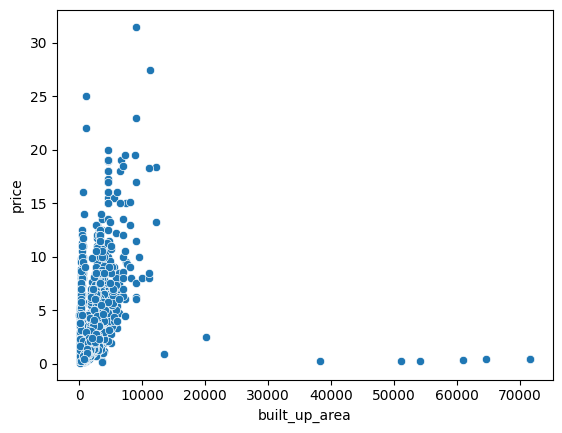

In [29]:
sns.scatterplot(x = df['built_up_area'],y = df['price'])

In [30]:
anamoly_df = df[(df['built_up_area'] < 2000) & (df['price'] > 2.5)][['price','area','built_up_area']]

In [31]:
anamoly_df.sample(5)

,price,area,built_up_area
780,3.80,2164.0,1700.00
2676,2.80,1700.0,1920.00
1984,10.50,3618.0,402.00
2252,12.50,3060.0,410.00
2934,2.65,2251.0,1750.75


In [32]:
anamoly_df['built_up_area'] = anamoly_df['area']

In [33]:
df.update(anamoly_df)

<Axes: xlabel='built_up_area', ylabel='price'>

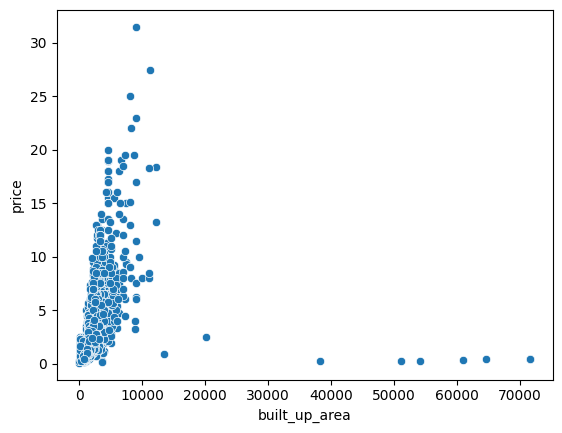

In [34]:
sns.scatterplot(x = df['built_up_area'],y = df['price'])

In [35]:
df.drop(columns=['area','areaWithType','super_built_up_area','carpet_area','area_room_ratio'],inplace=True)

In [36]:
df.head()

,property_type,sector,society,price,price_per_sqft,bedRoom,bathroom,balcony,floorNum,facing,agePossession,built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
0,flat,dwarka expressway,Ansals Highland Park,1.20,6186.0,3,3,3+,4.0,NaN,Under Construction,1940.0,0,1,0,0,0,0,0
1,flat,sector 86,Ansal Heights 86,1.30,4666.0,4,6,2,11.0,East,New Property,2521.0,0,1,0,0,1,0,86
2,flat,sohna road,Signature Global Park4.0 ★,0.72,5990.0,2,2,3,3.0,North-West,Relatively New,1095.0,0,0,0,1,0,0,158
3,house,sector 112,experion windchants,9.50,23457.0,5,5,3,2.0,NaN,Relatively New,7450.0,0,1,0,0,0,0,45
4,flat,sector 70a,BPTP Astaire Gardens3.7 ★,1.60,8658.0,4,4,3,1.0,NaN,Relatively New,1600.0,1,0,0,0,1,0,42


In [37]:
df.isnull().sum()

property_type         0
sector                0
society               1
price                 0
price_per_sqft        0
bedRoom               0
bathroom              0
balcony               0
floorNum             17
facing             1009
agePossession         0
built_up_area         0
study room            0
servant room          0
store room            0
pooja room            0
others                0
furnishing_type       0
luxury_score          0
dtype: int64

### floorNum

In [38]:
df[df['floorNum'].isnull()]

,property_type,sector,society,price,price_per_sqft,bedRoom,bathroom,balcony,floorNum,facing,agePossession,built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
388,house,sector 48,vipul tatvam villa,8.50,26235.0,4,4,1,NaN,NaN,Relatively New,3240.0,0,0,0,0,0,0,21
488,house,sector 43,ansal sushant lok,10.50,27911.0,4,4,2,NaN,North-East,Old Property,3762.0,0,1,0,0,0,0,59
499,house,sector 43,ansal sushant lok plots,3.30,26570.0,1,1,0,NaN,NaN,Under Construction,1242.0,0,0,0,0,0,0,0
628,flat,sector 78,NaN,0.60,3692.0,2,2,0,NaN,NaN,Under Construction,1625.0,0,0,0,0,0,0,0
640,house,sector 4,independent,0.65,11111.0,4,2,2,NaN,NaN,Moderately Old,585.0,0,0,0,0,0,0,0
821,house,sector 24,independent,1.45,2984.0,3,3,1,NaN,NaN,Old Property,540.0,0,0,0,0,0,0,9
880,house,sector 25,independent,13.00,45710.0,6,8,3+,NaN,NaN,Relatively New,2844.0,1,1,1,1,0,2,0
913,house,sector 86,dlf new town heights,2.47,7719.0,4,4,3+,NaN,West,Moderately Old,2800.0,0,1,0,1,0,1,130
983,house,sector 12,jacob pura,0.35,9722.0,2,1,0,NaN,NaN,Old Property,360.0,0,0,0,0,0,0,0
1047,house,sector 2,independent,5.60,17284.0,8,6,3+,NaN,South-West,Moderately Old,3240.0,1,1,1,1,0,0,0


In [39]:
df[df['property_type'] == 'house']['floorNum'].median()

2.0

In [40]:
df['floorNum'].fillna(2.0,inplace=True)

In [41]:
df.isnull().sum()

property_type         0
sector                0
society               1
price                 0
price_per_sqft        0
bedRoom               0
bathroom              0
balcony               0
floorNum              0
facing             1009
agePossession         0
built_up_area         0
study room            0
servant room          0
store room            0
pooja room            0
others                0
furnishing_type       0
luxury_score          0
dtype: int64

In [42]:
1011/df.shape[0]

0.2845482690683929

### facing

<Axes: ylabel='count'>

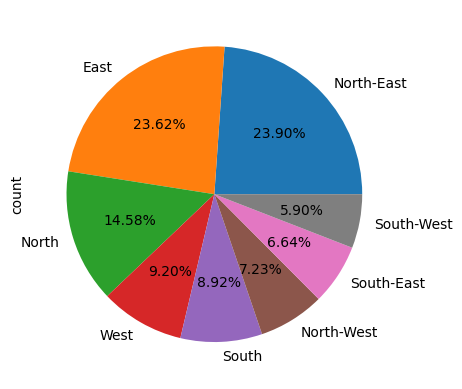

In [43]:
df['facing'].value_counts().plot(kind='pie',autopct='%0.2f%%')

In [44]:
df.drop(columns=['facing'],inplace=True)

In [45]:
df.sample(5)

,property_type,sector,society,price,price_per_sqft,bedRoom,bathroom,balcony,floorNum,agePossession,built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
471,flat,sector 37d,Ramprastha The Edge Towers3.5 ★,0.98,5537.0,3,3,3+,5.0,Relatively New,1675.0,0,0,0,1,0,0,174
294,flat,sector 102,Conscient Heritage Max4.3 ★,1.75,2414.0,3,4,3+,16.0,Relatively New,1748.0,0,1,0,0,0,1,134
623,flat,sector 53,Parsvnath Exotica3.7 ★,6.44,19003.0,4,4,3,7.0,Moderately Old,3068.0,0,1,0,0,0,1,80
1125,flat,sector 70,Shree Vardhman Victoria3.8 ★,1.67,14384.0,3,5,3,5.0,Moderately Old,1527.0,0,1,0,0,0,0,108
3013,flat,sector 99a,Pareena Coban Residences,1.23,6159.0,3,5,3,5.0,Relatively New,1807.0,0,1,0,0,0,0,99


In [46]:
df.isnull().sum()

property_type      0
sector             0
society            1
price              0
price_per_sqft     0
bedRoom            0
bathroom           0
balcony            0
floorNum           0
agePossession      0
built_up_area      0
study room         0
servant room       0
store room         0
pooja room         0
others             0
furnishing_type    0
luxury_score       0
dtype: int64

In [47]:
df.drop(index=[2536],inplace=True)

In [48]:
df.isnull().sum()

property_type      0
sector             0
society            1
price              0
price_per_sqft     0
bedRoom            0
bathroom           0
balcony            0
floorNum           0
agePossession      0
built_up_area      0
study room         0
servant room       0
store room         0
pooja room         0
others             0
furnishing_type    0
luxury_score       0
dtype: int64

### agePossession

In [49]:
df['agePossession'].value_counts()

agePossession
Relatively New        1611
New Property           556
Moderately Old         541
Undefined              291
Old Property           289
Under Construction     264
Name: count, dtype: int64

In [50]:
df[df['agePossession'] == 'Undefined']

,property_type,sector,society,price,price_per_sqft,bedRoom,bathroom,balcony,floorNum,agePossession,built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
18,flat,sector 79,"Godrej 101, Sector 79",1.25,9038.0,2,2,3,1.0,Undefined,1383.0,0,0,0,0,0,0,0
30,flat,sector 92,Sare Petioles,1.30,6373.0,4,4,0,7.0,Undefined,2040.0,0,0,0,0,0,0,0
35,flat,sohna road,Signature Global Park4.0 ★,0.58,7056.0,2,2,2,3.0,Undefined,822.0,0,0,0,0,0,0,0
49,flat,sector 103,Chintamani,1.57,8509.0,3,3,3,1.0,Undefined,1845.0,0,0,0,0,0,0,0
55,house,sector 3,independent,0.90,8929.0,3,1,0,1.0,Undefined,1008.0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3519,house,sector 50,independent,13.20,27155.0,6,6,0,2.0,Undefined,4861.0,0,0,0,0,0,0,0
3535,house,sector 50,unitech espace,11.50,35494.0,5,6,0,1.0,Undefined,3240.0,0,0,0,0,0,0,0
3537,house,sector 103,satya the hermitage,3.15,6702.0,4,5,0,12.0,Undefined,4700.0,0,0,0,0,0,0,61
3542,house,sector 63,dlf the arbour,8.50,21519.0,4,4,3+,27.0,Undefined,3950.0,0,0,0,0,0,0,61


In [51]:
def mode_based_imputation(row):
    if row['agePossession'] == 'Undefined':
        mode_value = df[(df['sector'] == row['sector']) & (df['property_type'] == row['property_type'])]['agePossession'].mode()
        # If mode_value is empty (no mode found), return NaN, otherwise return the mode
        if not mode_value.empty:
            return mode_value.iloc[0] 
        else:
            return np.nan
    else:
        return row['agePossession']

In [52]:
df['agePossession'] = df.apply(mode_based_imputation,axis=1)

In [53]:
df['agePossession'].value_counts()

agePossession
Relatively New        1735
New Property           585
Moderately Old         583
Old Property           318
Under Construction     279
Undefined               52
Name: count, dtype: int64

In [54]:
def mode_based_imputation2(row):
    if row['agePossession'] == 'Undefined':
        mode_value = df[(df['sector'] == row['sector'])]['agePossession'].mode()
        # If mode_value is empty (no mode found), return NaN, otherwise return the mode
        if not mode_value.empty:
            return mode_value.iloc[0] 
        else:
            return np.nan
    else:
        return row['agePossession']

In [55]:
df['agePossession'] = df.apply(mode_based_imputation2,axis=1)

In [56]:
df['agePossession'].value_counts()

agePossession
Relatively New        1744
Moderately Old         590
New Property           586
Old Property           321
Under Construction     279
Undefined               32
Name: count, dtype: int64

In [57]:
def mode_based_imputation3(row):
    if row['agePossession'] == 'Undefined':
        mode_value = df[(df['property_type'] == row['property_type'])]['agePossession'].mode()
        # If mode_value is empty (no mode found), return NaN, otherwise return the mode
        if not mode_value.empty:
            return mode_value.iloc[0] 
        else:
            return np.nan
    else:
        return row['agePossession']

In [58]:
df['agePossession'] = df.apply(mode_based_imputation3,axis=1)

In [59]:
df['agePossession'].value_counts()

agePossession
Relatively New        1746
Moderately Old         620
New Property           586
Old Property           321
Under Construction     279
Name: count, dtype: int64

In [60]:
df.isnull().sum()

property_type      0
sector             0
society            1
price              0
price_per_sqft     0
bedRoom            0
bathroom           0
balcony            0
floorNum           0
agePossession      0
built_up_area      0
study room         0
servant room       0
store room         0
pooja room         0
others             0
furnishing_type    0
luxury_score       0
dtype: int64

In [61]:
df.to_csv('gurgaon_properties_missing_value_imputation.csv',index=False)

In [62]:
df.shape

(3552, 18)